# Discuss CNNs step by step, using a common example: MNIST Handwritten Digit Classification.

## 1. Understanding the Problem
- We aim to classify images of handwritten digits (0-9) from the MNIST dataset. Each image is 28x28 pixels, grayscale, with 10 output classes (digits 0-9).

## 2. Loading and Preprocessing the Dataset
- The MNIST dataset consists of images and corresponding labels. 
- To build a CNN, we first need to prepare this data.

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load the dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [5]:
# Normalize the pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [10]:
# Reshape the dataset to include the channel dimension (needed for CNN)
# MNIST images are grayscale, so the channel dimension is 1
X_train = X_train.reshape(-1, 28, 28, 1)# (batch_size, height, width, channels)
X_test = X_test.reshape(-1, 28, 28, 1)

## 3. Building the CNN Architecture
The architecture of a CNN consists of several key layers:

- Convolutional Layers: These layers apply filters to the input to detect features like edges, textures, or objects.
- Pooling Layers: Pooling layers reduce the spatial dimensions of the image while preserving important features.
- Fully Connected (Dense) Layers: After feature extraction, the image data is flattened and passed through dense layers for classification.

### Let's construct a CNN step by step:
#### Step 1: Define the Model

In [11]:
model = models.Sequential()

In [12]:
# Convolutional layer: Applies 32 filters of size 3x3, with ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

In [13]:
# Pooling layer: Reduces spatial dimensions (downsampling)
model.add(layers.MaxPooling2D((2, 2)))

In [14]:
# Adding a second convolutional and pooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Adding a third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [16]:
# Flatten the 3D output to 1D vector for dense layers
model.add(layers.Flatten())

# Adding a fully connected layer with 64 units
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 units (one for each class), using softmax activation
model.add(layers.Dense(10, activation='softmax'))


In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/25
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/25
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/25
1875/1875 [==============================] - 12s 7ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/25
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/25
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/25
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_ac

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 2.3010 - accuracy: 0.1135 - 518ms/epoch - 2ms/step
Test accuracy: 0.11349999904632568


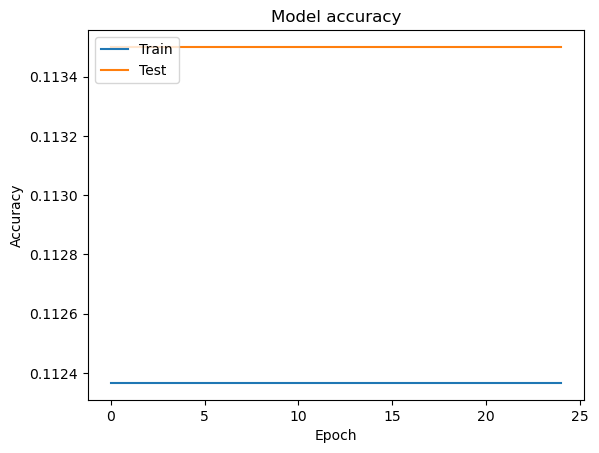

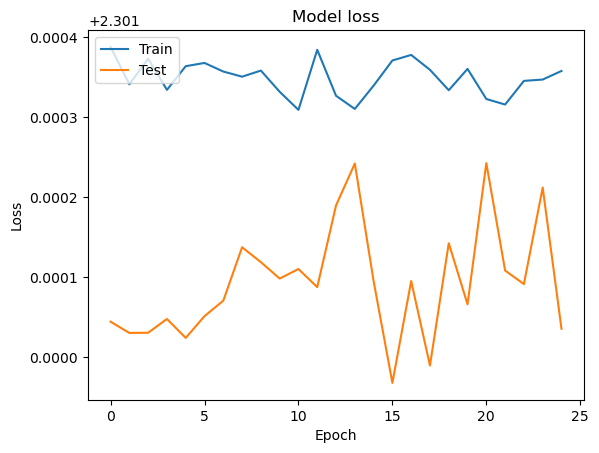

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
